# Packages

In [1]:
import numpy as np
import scipy
import os
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import pickle as pickle

# Extra Functions

In [2]:
def simulate():
    d = 0.005
    x = np.random.uniform(0,d)
    y = d-x
    x,y = np.random.uniform(0,d,2)

    dt = 0.05
    t = 35.0
    alpha = 0.25
    n = int(t/dt)
    X = np.zeros(n)
    Y = np.zeros(n)
    C = np.random.randint(0,2,n)

    for i in range(n):
        # Asynchronous
        if 0:
            if C[i]:
                x += (alpha + (x-y)) * (1-x) * dt
                x = max(x,0.0)
                y += (alpha + (y-x)) * (1-y) * dt
                y = max(y,0.0)
            else:
                y += (alpha + (y-x)) * (1-y) * dt
                y = max(y,0.0)
                x += (alpha + (x-y)) * (1-x) * dt
                x = max(x,0.0)
        # Synchronous
        else:
            dx = (alpha + (x-y)) * (1-x) * dt
            dy = (alpha + (y-x)) * (1-y) * dt
            x = max(x+dx, 0.0)
            y = max(y+dy, 0.0)
        X[i] = x
        Y[i] = y
    return X,Y

# Matrix Plot

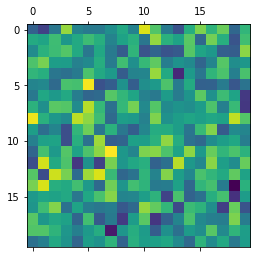

In [3]:
def samplemat(dims):
    aa = []
    for i in range(min(dims)):
        aa.append(np.random.normal(2,1,min(dims)))
    return aa
plt.matshow(samplemat((20,20)))
plt.show()

# Scatter

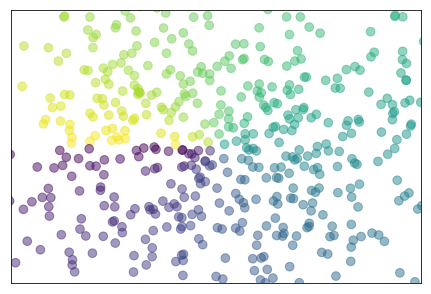

In [4]:
n = 600
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
fig = plt.figure()
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)
plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())
#plt.savefig('scatter.pdf')
plt.show()

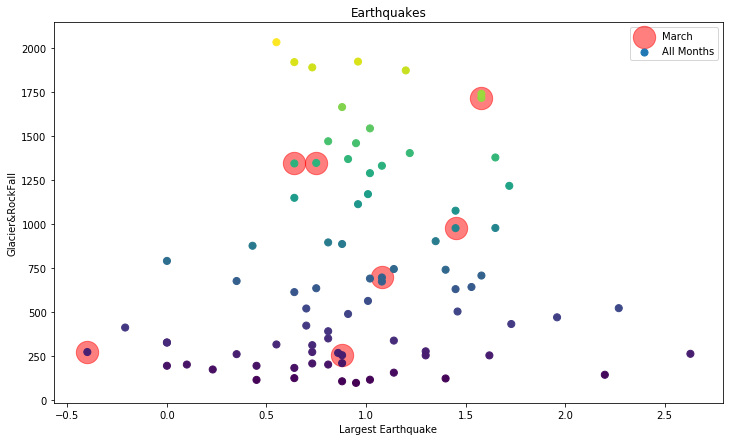

In [5]:
Marzo = np.loadtxt('./data/March.txt')
GRF = np.loadtxt('./data/GRF_vs_EQ.txt')

colors = GRF[:,0]/np.max(GRF[:,0])
fig = plt.figure(figsize=(12,7))
plt.scatter(Marzo[:,1],Marzo[:,0],color = 'r',label = 'March', alpha = 0.5, s = 500)
plt.scatter(GRF[:,1],GRF[:,0], c = colors,s = 50, label = 'All Months')
plt.title('Earthquakes')
plt.ylabel('Glacier&RockFall')
plt.xlabel('Largest Earthquake')
plt.legend()
#plt.savefig('earthquakes.pdf')
plt.show()

# 3D Scatter

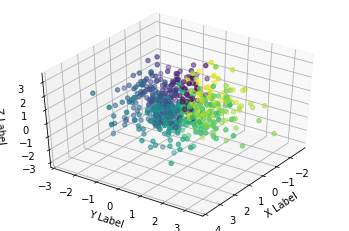

In [6]:
n = 600
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
Z = np.random.normal(0, 1, n)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=T)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(40, 35)
plt.show()

# Bar Plot

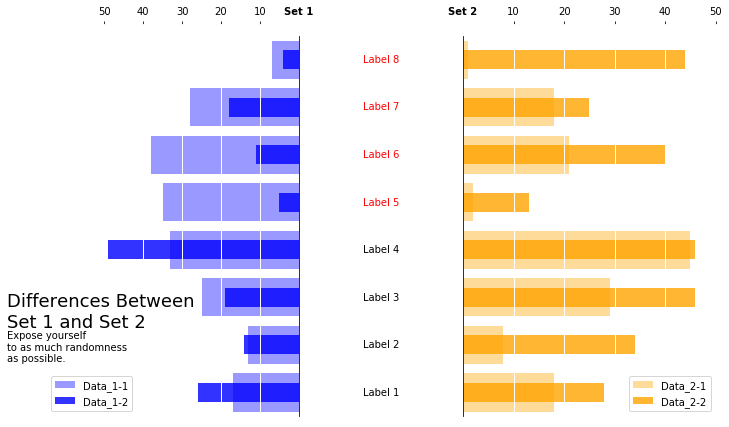

In [7]:
import matplotlib.patches as patches

np.random.seed(11)

data1_1 = []
data1_2 = []

data2_1 = []
data2_2 = []

labels   = ["Label 1","Label 2","Label 3","Label 4","Label 5","Label 6", "Label 7", "Label 8"]


for i in range(len(labels)):
    a = np.random.randint(1,50)
    b = np.random.randint(1,50)
    c = np.random.randint(1,50)
    d = np.random.randint(1,50)
    data1_1.append(a)
    data1_2.append(b)
    data2_1.append(c)
    data2_2.append(d)


matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure.subplot', wspace=.65)
matplotlib.rc('grid', color='white')
matplotlib.rc('grid', linewidth=1)
fig = plt.figure(figsize=(12,7), facecolor='white')
axes_left = plt.subplot(121)
axes_left.spines['left'].set_color('none')
axes_left.spines['right'].set_zorder(10)
axes_left.spines['bottom'].set_color('none')
axes_left.xaxis.set_ticks_position('top')
axes_left.yaxis.set_ticks_position('right')
axes_left.spines['top'].set_position(('data',len(labels)+.25))
axes_left.spines['top'].set_color('w')
plt.xlim(65,0)
plt.ylim(0,len(labels))

plt.xticks([50, 40, 30, 20, 10, 0],['50','40', '30','20' , '10', 'Set 1'])
axes_left.get_xticklabels()[-1].set_weight('bold')
axes_left.get_xticklines()[-1].set_markeredgewidth(0)
for label in axes_left.get_xticklabels():
    label.set_fontsize(10)
plt.yticks([])


for i in range(len(data1_1)):
    H,h = 0.8, 0.4
    value = data1_2[i]
    p = patches.Rectangle((0, i+(1-H)/2.0), value, H, fill=True, transform=axes_left.transData, facecolor='blue', alpha=0.4)
    axes_left.add_patch(p)
    value = data1_1[i]
    p = patches.Rectangle((0, i+(1-h)/2.0), value, h, fill=True, transform=axes_left.transData, facecolor='blue', alpha=0.8)
    axes_left.add_patch(p)

axes_left.grid()

plt.legend(('Data_1-1','Data_1-2'), loc = 'lower left')

plt.text(75,2.6,"Differences Between\nSet 1 and Set 2", fontsize=18,va="top")
plt.text(75,1.8,"""Expose yourself\n"""
                  """to as much randomness\n"""
                  """as possible.""", va="top", fontsize=10)

axes_right = plt.subplot(122, sharey=axes_left)


axes_right.spines['right'].set_color('none')
axes_right.spines['left'].set_zorder(10)
axes_right.spines['bottom'].set_color('none')
axes_right.xaxis.set_ticks_position('top')
axes_right.yaxis.set_ticks_position('left')
axes_right.spines['top'].set_position(('data',len(labels)+.25))
axes_right.spines['top'].set_color('w')


plt.xlim(0,30)
plt.ylim(0,len(labels))
plt.xticks([0, 10, 20, 30, 40, 50],['Set 2', '10','20', '30','40' , '50'])
axes_right.get_xticklabels()[0].set_weight('bold')
for label in axes_right.get_xticklabels():
    label.set_fontsize(10)
axes_right.get_xticklines()[1].set_markeredgewidth(0)
plt.yticks([])


for i in range(len(data2_1)):
    H,h = 0.8, 0.4
    value = data2_2[i]
    p = patches.Rectangle((0, i+(1-H)/2.0), value, H, fill=True, transform=axes_right.transData, facecolor='orange', alpha=0.4)
    axes_right.add_patch(p)
    value = data2_1[i]
    p = patches.Rectangle((0, i+(1-h)/2.0), value, h,fill=True, transform=axes_right.transData, facecolor='orange', alpha=0.8)
    axes_right.add_patch(p)

axes_right.grid()


for i in range(len(labels)):
    x1,y1 = axes_left.transData.transform_point((0,i+.5))
    x2,y2 = axes_right.transData.transform_point((0,i+.5))
    x,y = fig.transFigure.inverted().transform_point( ((x1+x2)/2,y1) )
    if i >=4:
        plt.text(x, y, labels[i], color = 'red', transform=fig.transFigure, fontsize=10,horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(x, y, labels[i], color = 'k', transform=fig.transFigure, fontsize=10,horizontalalignment='center', verticalalignment='center')

plt.legend(('Data_2-1','Data_2-2'), loc = 'lower right')
#plt.savefig('bar.pdf')
plt.show()

# Plot

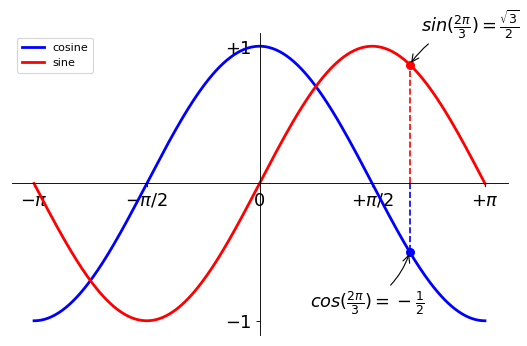

In [8]:
from pylab import *
figure(figsize=(8,5), dpi=80)
subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xlim(X.min()*1.1, X.max()*1.1)
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ylim(C.min()*1.1,C.max()*1.1)
yticks([-1, +1],[r'$-1$', r'$+1$'])


legend(loc='upper left')

t = 2*np.pi/3
plot([t,t],[0,np.cos(t)],color ='blue',  linewidth=1.5, linestyle="--")
scatter([t,],[np.cos(t),], 50, color ='blue')

annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', xy=(t, np.sin(t)),  xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plot([t,t],[0,np.sin(t)],color ='red',  linewidth=1.5, linestyle="--")
scatter([t,],[np.sin(t),], 50, color ='red')

annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),  xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))


#savefig("plot.pdf")
show()

# Violin Plot

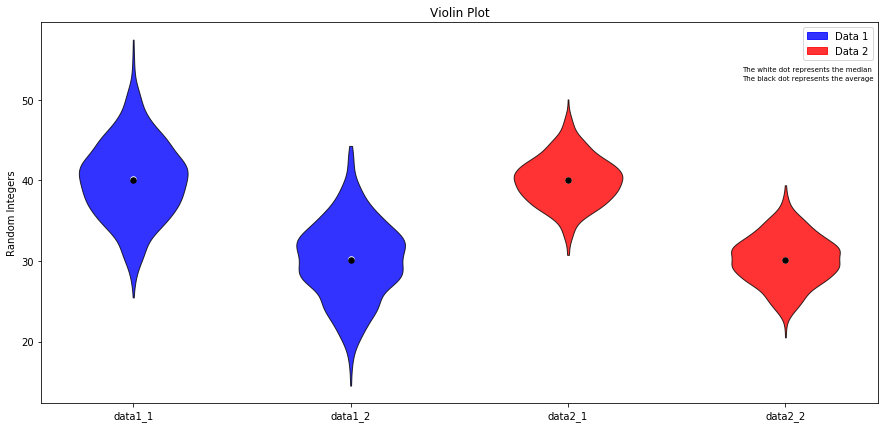

In [9]:
np.random.seed(30)

fig = plt.figure(figsize = (15,7))
plt.title('Violin Plot')
plt.ylabel('Random Integers')


data1_1 = np.random.normal(40,5,1000)
data1_2 = np.random.normal(30,5,1000)

data2_1 = np.random.normal(40,3,1000)
data2_2 = np.random.normal(30,3,1000)



data1 = [data1_1, data1_2]
data2 = [data2_1, data2_2]

violin_parts_natural = plt.violinplot(data1, positions = [1,2], showextrema=False)
violin_parts_retention = plt.violinplot(data2, positions = [3,4],showextrema=False)
for pc in violin_parts_retention['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    pc.set_linewidth(1)
    pc.set_alpha(0.8)
    
for pc in violin_parts_natural['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
    pc.set_linewidth(1)
    pc.set_alpha(0.8)
    

quartile1_natural, medians_natural, quartile3_natural = np.percentile(data1, [25, 50, 75], axis=1)
quartile1_retention, medians_retention, quartile3_retention = np.percentile(data2, [25, 50, 75], axis=1)

average_natural = []
average_retention = []


for i in range(2):
    average_natural.append(sum(data1[i])/len(data1[i]))
for i in range(2):
    average_retention.append(sum(data2[i])/len(data2[i]))
    
plt.scatter([1,2], medians_natural, marker='o', color='white', s=30, zorder=3)
plt.scatter([3,4], medians_retention, marker='o', color='white', s=30, zorder=3)
plt.scatter([1,2], average_natural, marker='o', color='k', s=30, zorder=3)
plt.scatter([3,4], average_retention, marker='o', color='k', s=30, zorder=3)


plt.text(3.8, 53.6, 'The white dot represents the median', color = 'k', fontsize=7)
plt.text(3.8, 52.4, 'The black dot represents the average', color = 'k', fontsize=7)

red_patch = patches.Patch(color='red', label = 'Data 2', alpha = 0.8)
blue_patch = patches.Patch(color='blue', label = 'Data 1', alpha = 0.8)
plt.legend(handles = [blue_patch,red_patch])

plt.xticks([1, 2, 3, 4],['data1_1', 'data1_2','data2_1','data2_2'])
#plt.savefig('violin.pdf')
plt.show()

# Zoom Plot

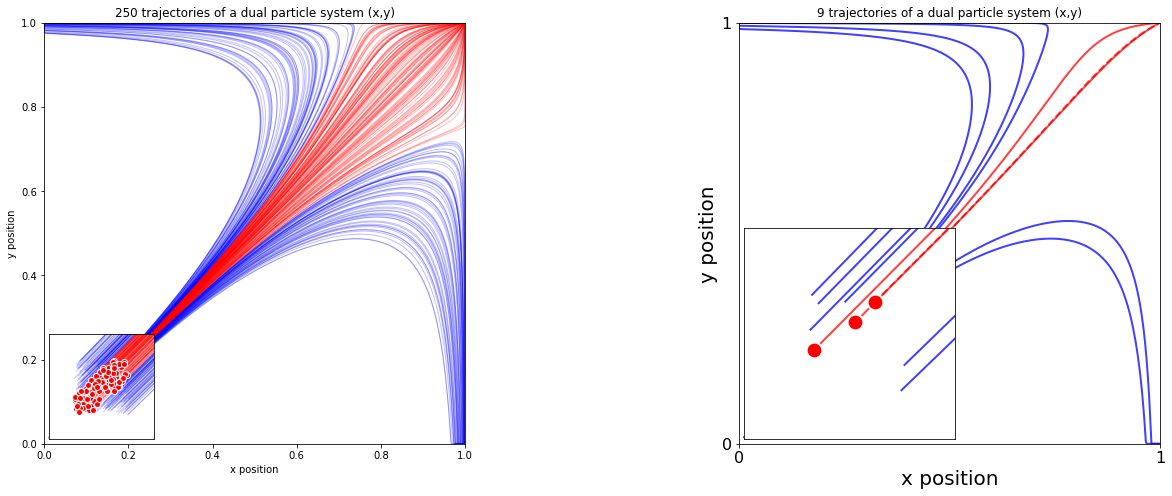

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


S = []
n = 250
for i in range(n):
    S.append(simulate())

plt.figure(figsize=(20,10))
ax = plt.subplot(121, aspect=1)
axins = zoomed_inset_axes(ax, 25, loc=3)


for i in range(n):
    X,Y = S[i]
    if X[-1] > 0.9 and Y[-1] > 0.9:
        c = "r"
        lw = 1.0
        axins.scatter( X[0],Y[0], c='r', edgecolor='w', zorder=10)
    else:
        c = "b"
        lw = 1.0
    ax.plot(X,Y, c=c, alpha=.25, lw=lw)
    axins.plot(X,Y, c=c, alpha=.25, lw=lw)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_title('%d trajectories of a dual particle system (x,y)' % n)
axins.set_xlim(0.01, 0.02)
axins.set_xticks([])
axins.set_ylim(0.01, 0.02)
axins.set_yticks([])

ax = plt.subplot(122, aspect=1)
axins = zoomed_inset_axes(ax, 50, loc=3)


n = 9
for i in range(n):
    X,Y = S[i]
    ls = '-'
    if i==2:
        ls='--'
    if X[-1] > 0.9 and Y[-1] > 0.9:
        c = "r"
        lw = 2.0
        axins.scatter( X[0],Y[0], s=250, c='r', edgecolor='w', zorder=10,lw=2)
    else:
        c = "b"
        lw = 2.0
    ax.plot(X,Y, c=c, alpha=.75, lw=lw, ls=ls)
    axins.plot(X,Y, c=c, alpha=.75, lw=lw, ls=ls)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["0", "1"], fontsize=16)
ax.set_yticklabels(["0", "1"], fontsize=16)
ax.set_xlabel('x position',fontsize=20)
ax.set_ylabel('y position',fontsize=20)
ax.set_title('%d trajectories of a dual particle system (x,y)' % n)
axins.set_xlim(0.01, 0.02)
axins.set_xticks([])
axins.set_ylim(0.01, 0.02)
axins.set_yticks([])

#plt.savefig('zoom.pdf')
plt.show()

# 3D Plot

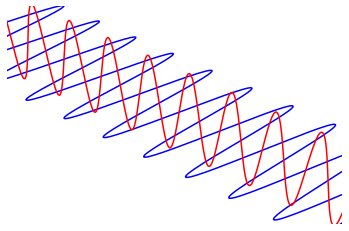

In [11]:
n = 600
oscillations = 10
amplitude = 10
theta = np.linspace(-np.pi*oscillations,np.pi*oscillations,n)
x = amplitude*np.cos(theta+np.pi/2)
y = amplitude*np.sin(theta)
z = np.zeros(n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, theta, z, color='blue')
ax.plot(z, theta, y, color='red')
ax.set_xlim(np.min(x)*oscillations/amplitude,np.max(x)*oscillations/amplitude)
ax.set_ylim(np.min(x)*oscillations/amplitude,np.max(x)*oscillations/amplitude)
ax.set_zlim(np.min(x)*oscillations/amplitude,np.max(x)*oscillations/amplitude)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45,45)
plt.axis('off')
plt.show()

# Contour

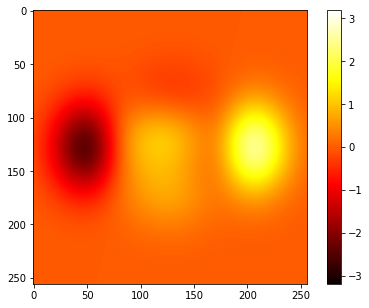

In [12]:
def f(x,y):
    return (1 - x / 2 + x**7 + y**3) * np.exp(-x**2 -y**2)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)
plt.axes([0.025, 0.025, 0.95, 0.95])
fig = plt.imshow(f(X,Y),interpolation='bicubic',cmap='hot',vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.colorbar(fig)
plt.show()

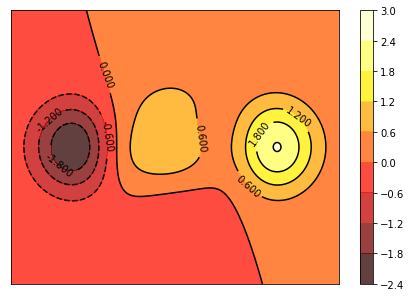

In [13]:
plt.axes([0.025, 0.025, 0.95, 0.95])
fig = plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='hot')
C = plt.contour(X, Y, f(X, Y), 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)
plt.colorbar(fig)
plt.xticks(())
plt.yticks(())
#plt.savefig('contour.pdf')
plt.show()

# 3D Wire-Frame

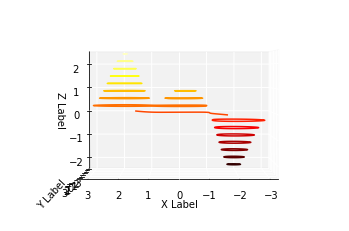

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, f(X,Y),15,cmap = 'hot')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_ylim(-np.pi,np.pi)
ax.set_xlim(-np.pi,np.pi)
ax.view_init(2, 90)
#plt.savefig('wire.pdf')
plt.show()

# Surface

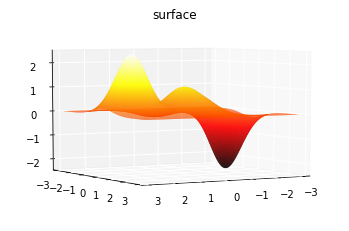

In [15]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f(X,Y), rstride=1, cstride=1,cmap='hot', edgecolor='none')
ax.set_ylim(-np.pi,np.pi)
ax.set_xlim(-np.pi,np.pi)
ax.set_title('surface')
ax.view_init(5, 60)
#plt.savefig('surface.pdf')
plt.show()

# Histogram Subplots

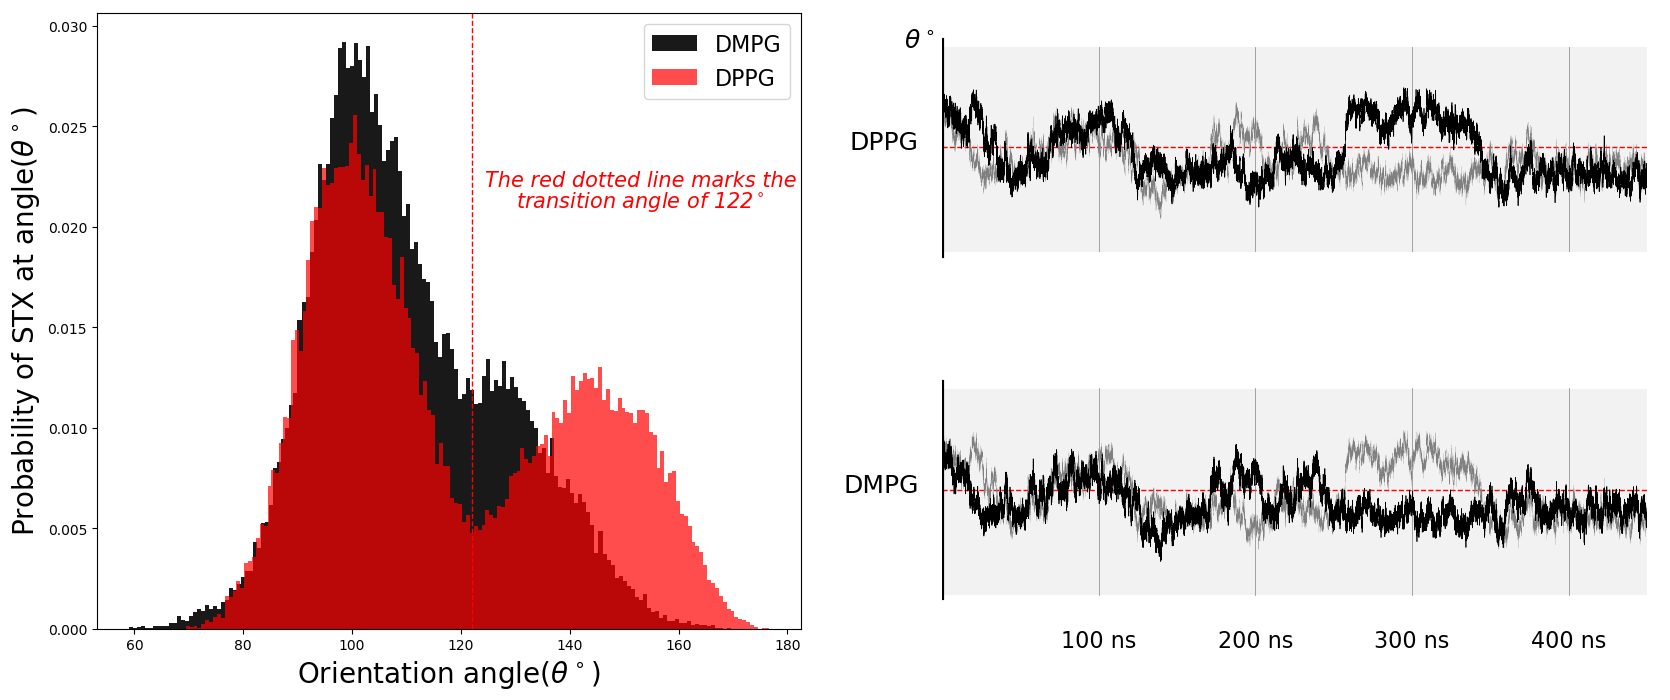

In [16]:
data_dmpg = np.loadtxt('./data/angles_dmpg.xvg', comments =['#','@'])
data_dppg = np.loadtxt('./data/angles_dppg.xvg', comments =['#','@'])
angles_dmpg = data_dmpg[:,1]
angles_dppg = data_dppg[:,1]
time = (data_dmpg[:,0]/1000)-50

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig = plt.figure(figsize=(20,8))

ax = plt.subplot(1,2,1)
plt.hist(angles_dmpg, label = "DMPG",bins =150,density = True, orientation = 'vertical',alpha = 0.9, color = 'k')
plt.hist(angles_dppg, label = "DPPG",bins =150,density = True, orientation = 'vertical',alpha = 0.7, color = 'r')
plt.text(153, 0.022, "The red dotted line marks the", ha = "center", fontsize=15, color = 'red', style = 'italic')
plt.text(153, 0.021, r'transition angle of 122$^\circ$', ha = "center", fontsize=15, color = 'red',style = 'italic')
plt.axvline(122,0,1,c='r', lw=1, linestyle = '--')
plt.xlabel(r'Orientation angle($\theta^\circ$)',fontsize=20)
plt.ylabel(r'Probability of STX at angle($\theta^\circ$)',fontsize=20)
plt.legend(fontsize=16)


ax = plt.subplot(1,2,2)
rects = plt.barh(120,450, align='center', height=180, color='.95', ec='None', zorder=-20)
rects = plt.barh(420,450, align='center', height=180, color='.95', ec='None', zorder=-20)
plt.xlim(0,450), plt.ylim(0,540)
plt.text(-15, 420, r'DPPG', ha = "right", fontsize=18)
plt.text(-5, 510, r'$\theta^\circ$', ha = "right", fontsize=18)
plt.axvline(0,   0.555+0.05, 0.555+0.4, c='k', lw=3)
plt.axhline(422, 0.0, 1.0,c='r', lw=1, zorder=-15, linestyle = '--')
plt.axvline(100, 0.558+0.055, 0.555+0.39, c='.5', lw=.5, zorder=-15)
plt.axvline(200, 0.558+0.055, 0.555+0.39, c='.5', lw=.5, zorder=-15)
plt.axvline(300, 0.558+0.055, 0.555+0.39, c='.5', lw=.5, zorder=-15)
plt.axvline(400, 0.558+0.055, 0.555+0.39, c='.5', lw=.5, zorder=-15)
plt.plot(time, angles_dppg+300, c='k', lw=0.5)
plt.plot(time, angles_dmpg+300, c='.5', lw=0.1, zorder=-10)


plt.text(-15, 120, 'DMPG', ha = "right", fontsize=18)
plt.axvline(0,   0.05, 0.4, c='k', lw=3)
plt.axvline(100, 0.055, 0.39, c='.5', lw=.5, zorder=-15)
plt.axhline(122, 0.0, 1.0,c='r', lw=1, zorder=-15,linestyle = '--')
plt.axvline(200, 0.055, 0.39, c='.5', lw=.5, zorder=-15)
plt.axvline(300, 0.055, 0.39, c='.5', lw=.5, zorder=-15)
plt.axvline(400, 0.055, 0.39, c='.5', lw=.5, zorder=-15)
plt.plot(time, angles_dmpg, c='k', lw=0.5)
plt.plot(time, angles_dppg, c='.5', lw=0.1, zorder=-10)

plt.text(100, 0, "100 ns", va = "top", ha="center", fontsize=16)
plt.text(200, 0, "200 ns", va = "top", ha="center", fontsize=16)
plt.text(300, 0, "300 ns", va = "top", ha="center", fontsize=16)
plt.text(400, 0, "400 ns", va = "top", ha="center", fontsize=16)
plt.axis('off')

#plt.savefig("histogram_subplots.pdf", bbox_inches = 'tight')
plt.show()

# Polar Plots

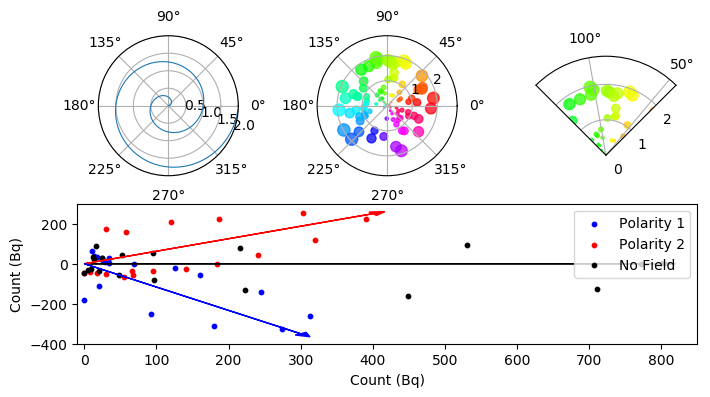

In [17]:
rtheta = np.arange(0, 2, 0.01)
theta = 2 * np.pi * rtheta
N = 100
rphi = 2 * np.random.rand(N)
phi = 2 * np.pi * np.random.rand(N)
area = 20 * rphi**2
colors = phi

fig = plt.figure(figsize =(8,4))
ax1 = plt.subplot(231, projection='polar')
ax1.plot(theta, rtheta,lw = 0.8)
ax1.set_rmax(2)
ax1.set_rticks([0.5, 1, 1.5, 2])
ax1.set_rlabel_position(-22.5)  
ax1.grid(True)

ax2 = plt.subplot(232, projection='polar')
c = ax2.scatter(phi, rphi, c=colors, s=area, cmap='hsv', alpha=0.75)

ax3 = plt.subplot(233, polar=True)
c = ax3.scatter(phi, rphi, c=colors, s=area, cmap='hsv', alpha=0.75)
ax3.set_thetamin(45)
ax3.set_thetamax(135)

data = np.genfromtxt('./data/magnetic.csv', delimiter = ',', skip_header = 1)
nopolar = data[:,4]
nopolar = nopolar[np.logical_not(np.isnan(nopolar))]
polarization1 = data[:,5]
polarization1 = polarization1[np.logical_not(np.isnan(polarization1))]
polarization2 = data[:,6]
polarization2 = polarization2[np.logical_not(np.isnan(polarization2))]
angles = np.deg2rad(10*np.arange(-9, 9))

ax4 = plt.subplot(212)
ax4.scatter(polarization1 * np.cos(angles), polarization1 * np.sin(angles), c = 'b', label = "Polarity 1", s = 10)
ax4.scatter(polarization2 * np.cos(angles), polarization2 * np.sin(angles), c = 'r', label = "Polarity 2",s = 10)
ax4.scatter(nopolar * np.cos(angles), nopolar * np.sin(angles), c = 'k', label = "No Field", s = 10)
ax4.arrow(0, 0, 800, 0, head_width=20, head_length=20, fc='k', ec='k')
ax4.arrow(0, 0, 400, 250, head_width=20, head_length=20, fc='r', ec='r')
ax4.arrow(0, 0, 300, -350, head_width=20, head_length=20, fc='b', ec='b')
ax4.legend(loc = 'best')
ax4.set_xlabel("Count (Bq)")
ax4.set_ylabel("Count (Bq)")
ax4.set_ylim(-400,300)
ax4.set_xlim(-10,850)
matplotlib.pyplot.subplots_adjust(right =0.9)
#plt.savefig('polar.pdf')
plt.show()

# Streamlines

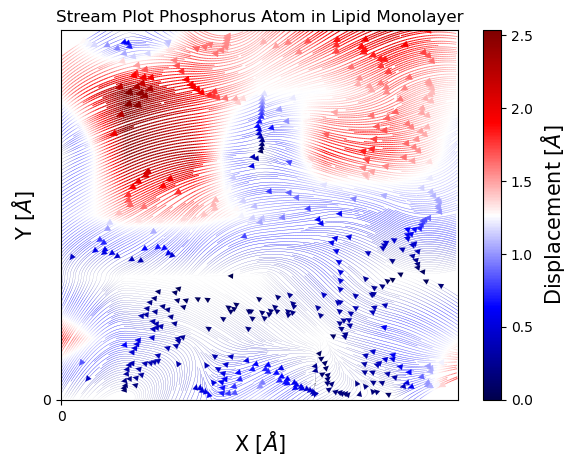

In [18]:
x = np.linspace(0,64,7)
y = np.linspace(0,64,7)

pickled_data = pickle.load(open('./data/streamline_store.p','rb'))
u1, v1, average_displacement, standard_deviation_of_displacement = pickled_data

speed = np.sqrt(u1*u1 + v1*v1)

fig = plt.figure()
ax = fig.add_subplot(111)

matplotlib.pyplot.xlabel(r'X [$\AA$]', size=15)
matplotlib.pyplot.ylabel(r'Y [$\AA$]', size=15)

im = ax.streamplot(x,y,u1,v1,density=(8,8),color =speed, linewidth=speed/speed.max(),cmap='seismic')

cbar = plt.colorbar(im.lines)
cbar.set_label(r'Displacement [$\AA$]',size=15)

plt.axis([0,64,0,64])
ax.set_title('Stream Plot Phosphorus Atom in Lipid Monolayer')
ax.set_xlim([0,64])
ax.set_ylim([0,64])
ax.set_xticks(np.arange(0,64,200))
ax.set_yticks(np.arange(0,64,200))
#fig.savefig('streamplot.pdf')
plt.show()

# Error Bars

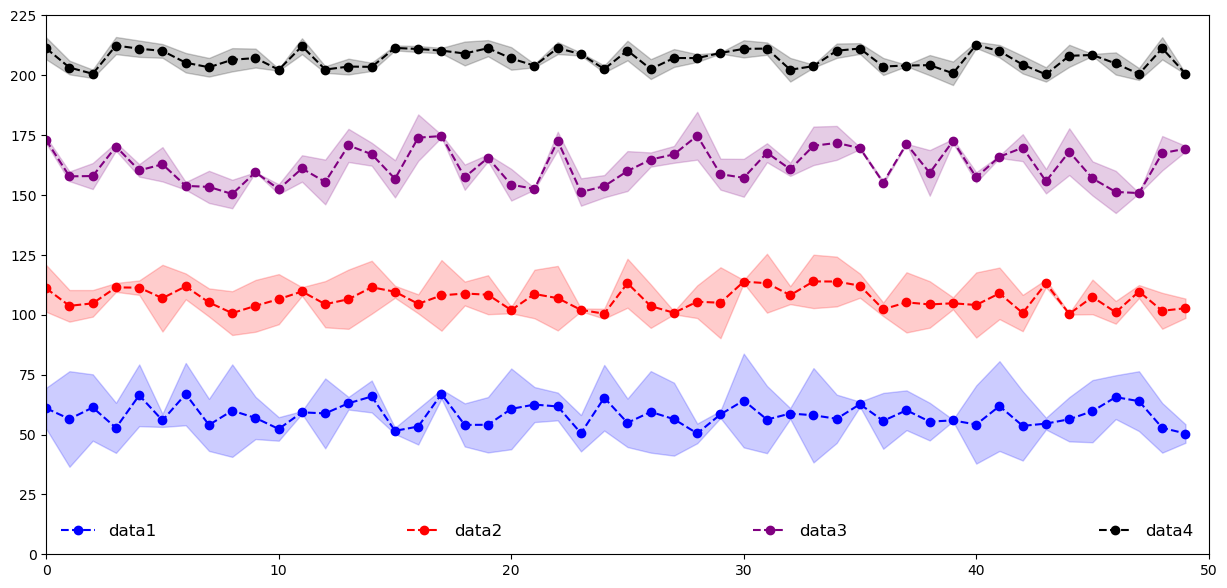

In [19]:
np.random.seed(30)
plt.figure(figsize = (15,7))
size = 50
data1 = np.random.rand(size)*17+50
data2 = np.random.rand(size)*14+100
data3 = np.random.rand(size)*25+150
data4 = np.random.rand(size)*13+200

e1 = np.random.rand(size)*20
e2 = np.random.rand(size)*15
e3 = np.random.rand(size)*10
e4 = np.random.rand(size)*5

x = range(0,size)

plt.errorbar(x, data1,fmt='--o', color = 'blue', label = 'data1')
plt.errorbar(x, data2,fmt='--o', color = 'red',label = 'data2')
plt.errorbar(x, data3,fmt='--o', color = 'purple',label = 'data3')
plt.errorbar(x, data4,fmt='--o', color = 'black',label = 'data4')
plt.fill_between(x,np.array(data1)-np.array(e1), np.array(data1)+np.array(e1), alpha = 0.2, color = 'blue')
plt.fill_between(x,np.array(data2)-np.array(e2), np.array(data2)+np.array(e2), alpha = 0.2,color = 'red')
plt.fill_between(x,np.array(data3)-np.array(e3), np.array(data3)+np.array(e3), alpha = 0.2,color = 'purple')
plt.fill_between(x,np.array(data4)-np.array(e4), np.array(data4)+np.array(e4), alpha = 0.2,color = 'black')
plt.xlim(0, size)
plt.ylim(0, 225)
plt.legend(loc = 'best', frameon = False, ncol = 4, mode = 'expand', fontsize = 12)
#plt.savefig('error_bars.pdf')
plt.show()

# Color With Imshow

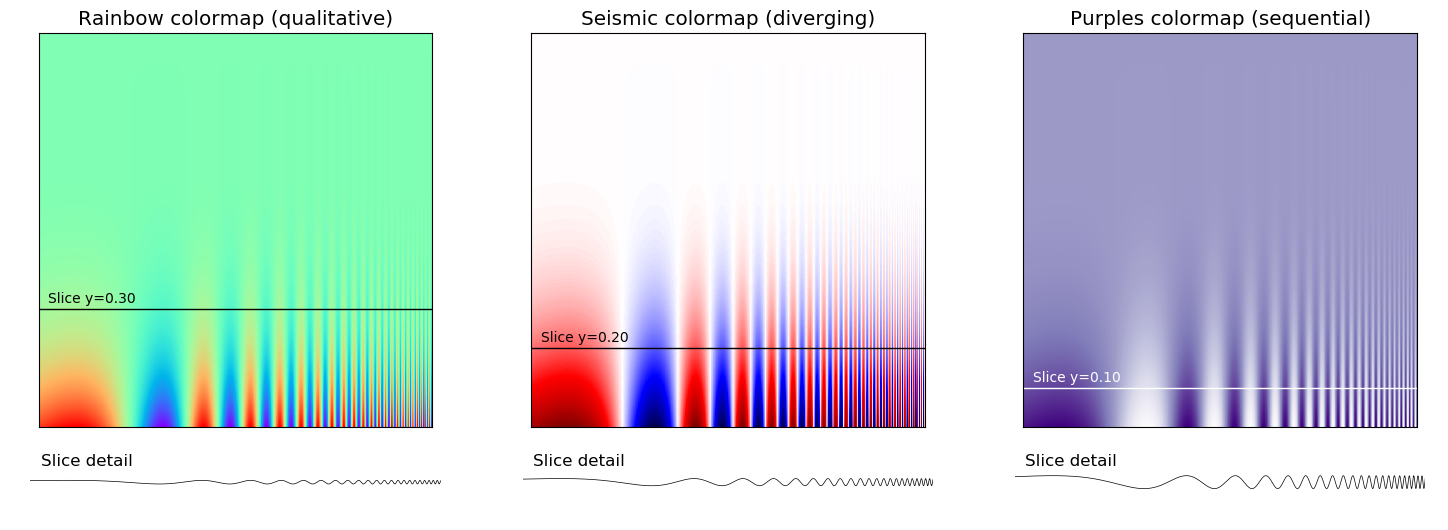

In [20]:
import matplotlib.patheffects as PathEffects
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def make(ax1, ax2, cmap, title, y, color='k'):
    # -----------------
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_xticks([])
    ax1.set_yticks([0,0.5,1])
    ax1.get_yaxis().tick_left()

    ax1.axhline(y, lw=1, c=color, xmin=0, xmax=1 )
    ax1.text(.025, y+0.015, "Slice y=%.2f" % y, fontsize=10, color=color)
    ax1.imshow(Z, cmap=cmap, origin='upper', extent=[0,1,0,1])
    ax1.set_xticks([]),ax1.set_yticks([])
    ax1.set_title(title)

    ax2.set_xlim(0,1)
    ax2.set_ylim(-0.1,+1.1)
    ax2.set_xticks([0,.5,1])
    ax2.get_xaxis().tick_bottom()
    ax2.set_yticks([0,1])
    ax2.get_yaxis().tick_left()
    ax2.plot(T/np.pi,Z[int(1024*(1-y))],c='k',lw=.5)
    ax2.axis("off")
    ax2.text(.025, 1.25, "Slice detail")



if __name__ == '__main__':
    fg = 0.0,0.0,0.0
    bg = 1.0,1.0,1.0
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    matplotlib.rcParams['font.size'] = 12.0
    matplotlib.rc('axes', facecolor = bg)
    matplotlib.rc('axes', edgecolor = fg)
    matplotlib.rc('xtick', color = fg)
    matplotlib.rc('ytick', color = fg)
    matplotlib.rc('figure', facecolor = bg)
    matplotlib.rc('savefig', facecolor = bg)


    plt.figure(figsize=(18,6))

    G = gridspec.GridSpec(2, 3, width_ratios=[1,1,1], height_ratios=[15,1])

    T = np.linspace(0,np.pi,1024)
    X,Y = np.meshgrid(T,T)
    Z = np.power(Y/2,5) * np.sin(np.exp(np.pi/2*X))
    Z = (Z-Z.min())/(Z.max()-Z.min())


    ax1 = plt.subplot(G[0,0], aspect=1)
    ax2 = plt.subplot(G[1,0])
    make(ax1, ax2, plt.cm.rainbow, "Rainbow colormap (qualitative)", y=.3)

    ax1 = plt.subplot(G[0,1], aspect=1)
    ax2 = plt.subplot(G[1,1])
    make(ax1, ax2, plt.cm.seismic, "Seismic colormap (diverging)", y=.2)

    ax1 = plt.subplot(G[0,2], aspect=1)
    ax2 = plt.subplot(G[1,2])
    make(ax1, ax2, plt.cm.Purples, "Purples colormap (sequential)", .1, 'white')

    #plt.savefig("color.pdf")
plt.show()

# Comic xkcd

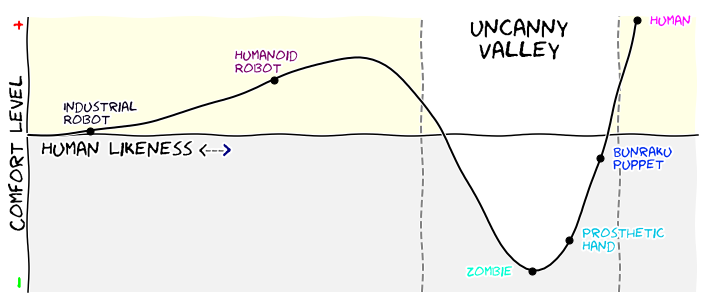

In [21]:
plt.xkcd()

def f(x):
    return X*X - 6*np.exp(-5*(X-2)*(X-2)) 

xmin = 0
xmax = 2.32

X = np.linspace(xmin,xmax,100)
Y = f(X)

fig = plt.figure(figsize=(12,5), dpi=72,facecolor="white")
axes = plt.subplot(111)

plt.plot(X,Y, color = 'k', linewidth=2, linestyle="-", zorder=+10)

axes.set_xlim(X.min(),X.max())
axes.set_ylim(1.01*Y.min(), 1.01*Y.max())

axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.xaxis.set_ticks_position('bottom')
axes.spines['bottom'].set_position(('data',0))
axes.yaxis.set_ticks_position('left')
axes.spines['left'].set_position(('data',X.min()))

axes.set_xticks([])
axes.set_yticks([])
axes.set_xlim( 1.05*X.min(), 1.10*X.max() )
axes.set_ylim( 1.15*Y.min(), 1.05*Y.max() )

T = [10,40,82,88,93,99]
plt.scatter( X[T], Y[T], s=50, zorder=+12, c='k')


colors = []

for t in T:
    if X[t] < xmax/2.0:
        new_color = (Y[t]/np.max(Y[T]), 0, X[t]/np.max(X[T]))
        colors.append(new_color)
    elif X[t] >= xmax/2.0 and Y[t] < 0:
        new_color = (0, Y[t]/np.min(Y[T]), X[t]/np.max(X[T]))
        colors.append(new_color)
    elif X[t] >= xmax/2.0:
        new_color = (Y[t]/np.max(Y[T]), 0, X[t]/np.max(X[T]) )
        colors.append(new_color)
    
plt.text(X[T[0]]-.1, Y[T[0]]+.1, "Industrial\nRobot", ha='left', va='bottom', color = colors[0])
plt.text(X[T[1]]-.15, Y[T[1]]+.1, "Humanoid\nRobot", ha='left', va='bottom',color = colors[1])
plt.text(X[T[2]]-.25, Y[T[2]], "Zombie", ha='left', va='center',color = colors[2])
plt.text(X[T[3]]+.05, Y[T[3]], "Prosthetic\nHand", ha='left', va='center',color = colors[3])
plt.text(X[T[4]]+.05, Y[T[4]], "Bunraku\nPuppet", ha='left', va='center',color = colors[4])
plt.text(X[T[5]]+.05, Y[T[5]], "Human", ha='left', va='center',color = colors[5])
plt.text(X[T[2]]-0.05, 1.5, "Uncanny\nValley", ha='center', va='center', fontsize=24, color = 'k')

plt.ylabel("Comfort Level",y=.5, fontsize=20, color = 'k')
plt.text(-.08, 1.8, "+",ha='left', va='top', color=(1,0,0,1), fontsize=30, rotation = 'vertical')
plt.text(-.08, -2.2, "-",ha='left', va='top', color=(0,1,0,1), fontsize=30, rotation = 'vertical')
plt.text(.05, -.1, "Human Likeness",ha='left', va='top', color='k', fontsize=20)
plt.text(0.74, -.15, ">",ha='left', va='top', color=(0,0,0.5,1), fontsize=20)
plt.text(.674, -.142, "---",ha='left', va='top', color='0.3', fontsize=15)
plt.text(0.65, -.15, "<",ha='left', va='top', color='k', fontsize=20)

X = np.linspace(0,1.1*xmax,100)
axes.fill_between(X, 0, -10, color = '0.95', zorder=-1)
axes.fill_between(X, 0, +10, color = (1,1,0.8,0.5), zorder=-1)


X = np.linspace(1.5,2.25,100)
Y = f(X)
axes.fill_between(X, Y, +10, color = (1,1,1,1), zorder=-1)

axes.axvline(x=1.5,ymin=0,ymax=1, color='.5', ls='--', linewidth = '2')
axes.axvline(x=2.25,ymin=0,ymax=1, color='.5', ls='--', linewidth = '2')

#plt.savefig("xkcd.pdf")
plt.show()

# 1D Animation

0

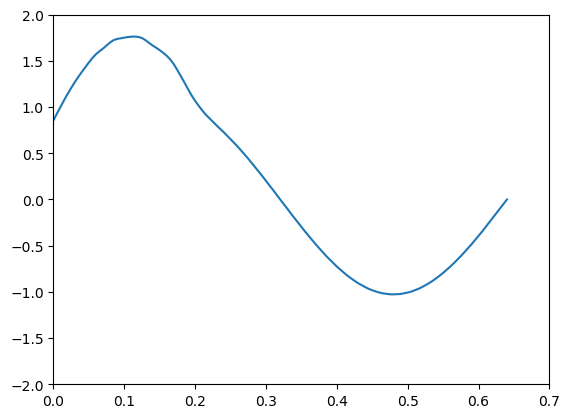

In [24]:
from matplotlib import animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

os.system('gcc -o wave1D.x wave1D.c -lm')
fig = plt.figure()
ax = plt.axes(xlim=(0, 0.7), ylim=(-2.0, 2.0))
line, = ax.plot([], [])
dpi = 600

def init():
    line.set_data([], [])
    return line,

def animate(j):
    os.system('echo %d|./wave1D.x' %j)
    datos = np.genfromtxt('data1.txt' , delimiter = ',')
    x = datos[:,0]
    up2 = datos[:,2]
    line.set_data(x, up2)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=20, blit=True)
writer = animation.writers['ffmpeg'](fps=60)
#anim.save('string.mp4', writer = writer, dpi = dpi) #remove comment to run
os.system('rm data1.txt')
os.system('rm wave1D.x')

# 2D Animation

0

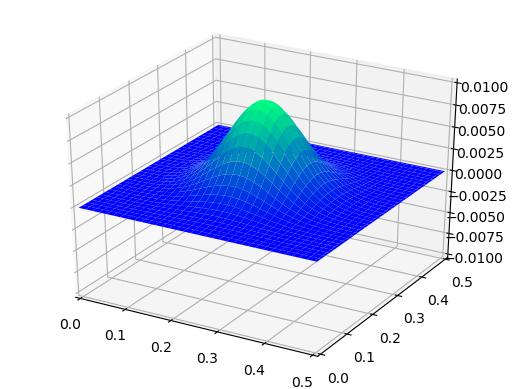

In [23]:
os.system('gcc -o wave2D.x wave2D.c -lm')

x = np.linspace(0,0.5,101)
y = np.linspace(0,0.5,101)
X,Y = np.meshgrid(x,y)

figT = plt.figure()
ax = figT.gca(projection='3d')
ax.set_xlim(0.0,0.5)
ax.set_ylim(0.0,0.5)
ax.set_zlim(-0.01,0.01)
dpi = 600

def animateT(j):
    ax.clear()
    ax.set_xlim(0.0,0.5)
    ax.set_ylim(0.0,0.5)
    ax.set_zlim(-0.01,0.01)
    os.system('echo %d|./wave2D.x' %j)
    z = np.genfromtxt('data2.txt')
    z1 = np.array(z[:])
    z2 = z1.reshape((101,101))
    line = ax.plot_surface(X,Y,z2,cmap='winter')
    return line,

anim = animation.FuncAnimation(figT, animateT,frames=500, interval=20, blit=True)
writer = animation.writers['ffmpeg'](fps=60)
#anim.save('drum.mp4', writer = writer, dpi = dpi) #remove comment to run

os.system('rm data2.txt')
os.system('rm wave2D.x')